In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from data_loading import get_amazon_data
from evaluation import evaluate_policy_on_amazon_new, create_offline_dataset
from policies.linucb import LinUCB

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

In [5]:
PROJECT_DIR = '.'

In [6]:
data = get_amazon_data()
(
    actions, action_features, action_biases, user_stream, user_features, user_biases, reward_list, ratings_list
) = data

In [7]:
times = 20000

In [8]:
def plot_ctrs(reward_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    N = 100
    
    reward_list = sorted(
        [
            (l,r) for l, r in reward_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, reward in reward_list:
        times = (range(1, len(reward)+1))
        ctr = [r/t for r,t in zip(reward, times)]
        ax.plot(ctr[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('CTR on Amazon')

    plt.legend();
    plt.show();

In [9]:
def plot_ndcg(cumulative_ndcg_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    N = 100
    
    cumulative_ndcg_list = sorted(
        [
            (l,r) for l, r in cumulative_ndcg_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, cumulative_ndcg in cumulative_ndcg_list:
        times = (range(1, len(cumulative_ndcg)+1))
        average_cumulative_ndcg = [cn/t for cn,t in zip(cumulative_ndcg, times)]
        ax.plot(average_cumulative_ndcg[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('Average Cumulative NDCG@5')
    ax.set_title('Average Cumulative NDCG@5 on Amazon')

    plt.legend();
    plt.show();

In [10]:
start_ts = time.time()
linucb_policy = LinUCB(context_dimension=100, alpha=0.8)

seq_reward_linucb, seq_ndcg_linucb= evaluate_policy_on_amazon_new(
    linucb_policy, times, actions, action_features, action_biases, user_stream,
    user_features, user_biases, reward_list, ratings_list
)
print(f"Total reward is {seq_reward_linucb[-1][0]}")
print(f"Total time is {datetime.timedelta(seconds=time.time() - start_ts)}")


WARNING !!!
Feature flag is ON, using NEW evaluation function

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
Total reward is 3283.0
Total time is 0:00:53.317990


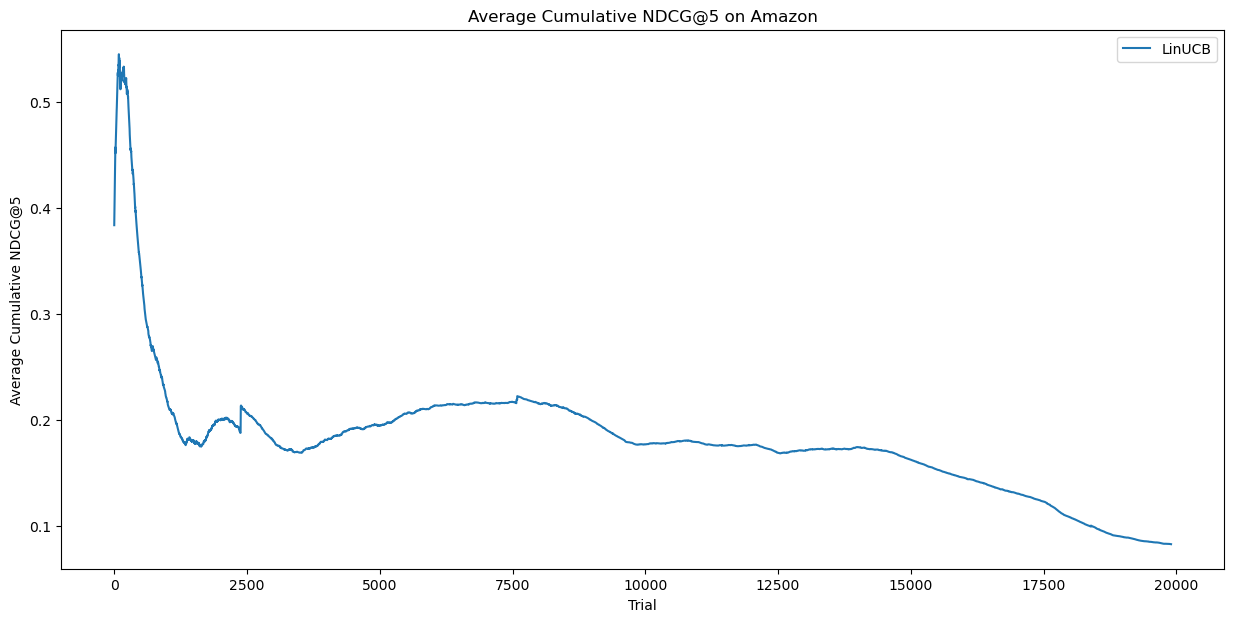

In [11]:
plot_ndcg(
    {
        'LinUCB': seq_ndcg_linucb,
        
    }
)

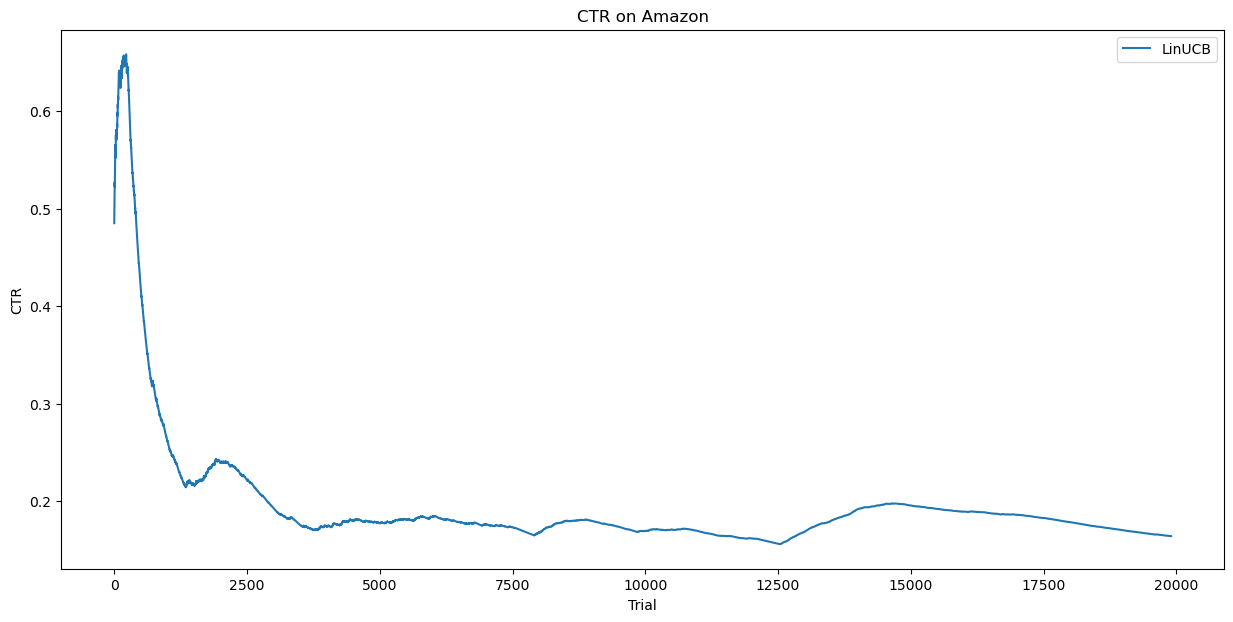

In [12]:
plot_ctrs(
    {
        'LinUCB': seq_reward_linucb,
    }
)